In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, \
GradientBoostingClassifier, VotingClassifier
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('aviation1.csv')
print(df.head())

  Investigation.Type Accident.Number  Event.Date        Country  \
0           Accident      SEA87LA080  1948-10-24  United States   
1           Accident      LAX94LA336  1962-07-19  United States   
2           Accident      NYC07LA005  1974-08-30  United States   
3           Accident      LAX96LA321  1977-06-19  United States   
4           Accident      CHI79FA064  1979-08-02  United States   

  Injury.Severity Aircraft.damage      Make Purpose.of.flight  \
0        Fatal(2)       Destroyed   Stinson          Personal   
1        Fatal(4)       Destroyed     Piper          Personal   
2        Fatal(3)       Destroyed    Cessna          Personal   
3        Fatal(2)       Destroyed  Rockwell          Personal   
4        Fatal(1)       Destroyed    Cessna          Personal   

   Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0             

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      87282 non-null  object 
 1   Accident.Number         87282 non-null  object 
 2   Event.Date              87282 non-null  object 
 3   Country                 87056 non-null  object 
 4   Injury.Severity         86399 non-null  object 
 5   Aircraft.damage         84272 non-null  object 
 6   Make                    87219 non-null  object 
 7   Purpose.of.flight       81493 non-null  object 
 8   Total.Fatal.Injuries    75881 non-null  float64
 9   Total.Serious.Injuries  74772 non-null  float64
 10  Total.Minor.Injuries    75349 non-null  float64
 11  Total.Uninjured         81370 non-null  float64
 12  Weather.Condition       83304 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.7+ MB


In [4]:
df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
dtype: int64

In [5]:
df.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,75881.000000,74772.000000,75349.000000,81370.000000
mean,0.652772,0.280921,0.360814,5.311847
std,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


In [6]:
#replace null values in injuries with 0
cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Total.Minor.Injuries', 'Total.Uninjured']
df[cols] = df[cols].fillna(0)

In [7]:
# df['Injury.Severity'] = df['Injury.Severity'].str.replace('\W', '', regex=True)

In [8]:
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')

In [9]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')

In [10]:
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')

In [11]:
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')

In [12]:
df.isnull().sum()

Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                   226
Injury.Severity             0
Aircraft.damage             0
Make                       63
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
dtype: int64

In [13]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name()
df['Day'] = df['Event.Date'].dt.day_name()

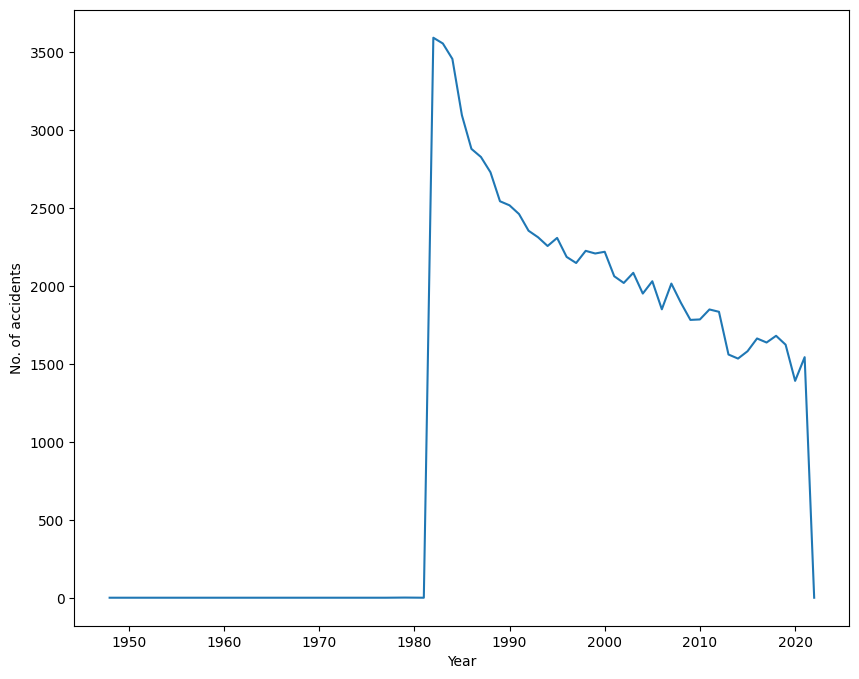

In [14]:
yearly = df.groupby('Year')['Accident.Number'].count().reset_index()

plt.figure(figsize=(10,8))
plt.plot(yearly['Year'], yearly['Accident.Number'])
plt.xlabel('Year')
plt.ylabel('No. of accidents')
plt.show()

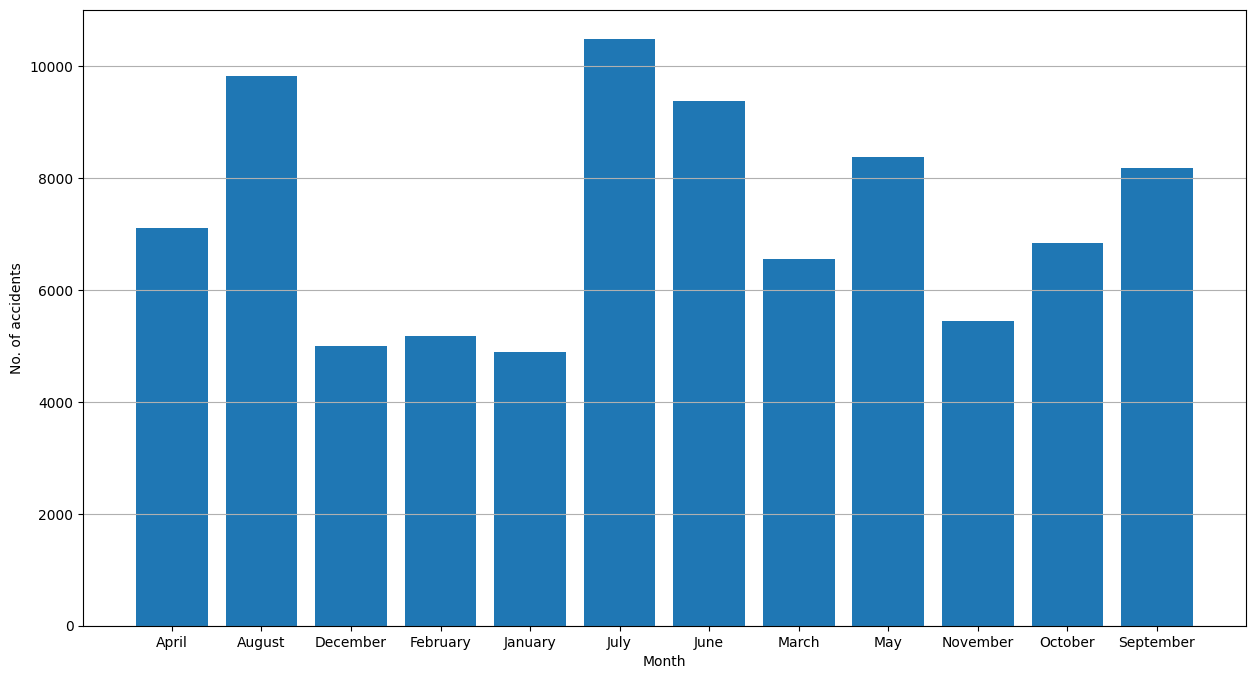

In [15]:
monthly = df.groupby('Month')['Accident.Number'].count().reset_index()

plt.figure(figsize=(15,8))
plt.bar(monthly['Month'], monthly['Accident.Number'])
plt.xlabel('Month')
plt.ylabel('No. of accidents')
plt.grid(axis='y')
plt.show()

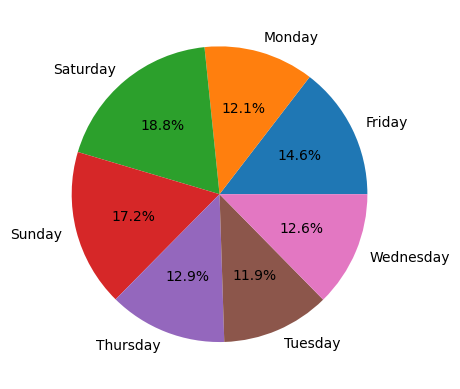

In [16]:
week_day = df.groupby('Day')['Accident.Number'].count().reset_index()

plt.pie(week_day['Accident.Number'], labels=week_day['Day'], autopct='%1.1f%%')
plt.show()

In [17]:
injuries_col = ['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                'Total.Minor.Injuries', 'Total.Uninjured']

In [18]:
incident = df[df['Investigation.Type'] == 'Incident']
incident_injuries = incident.groupby('Year')[injuries_col].sum().reset_index()


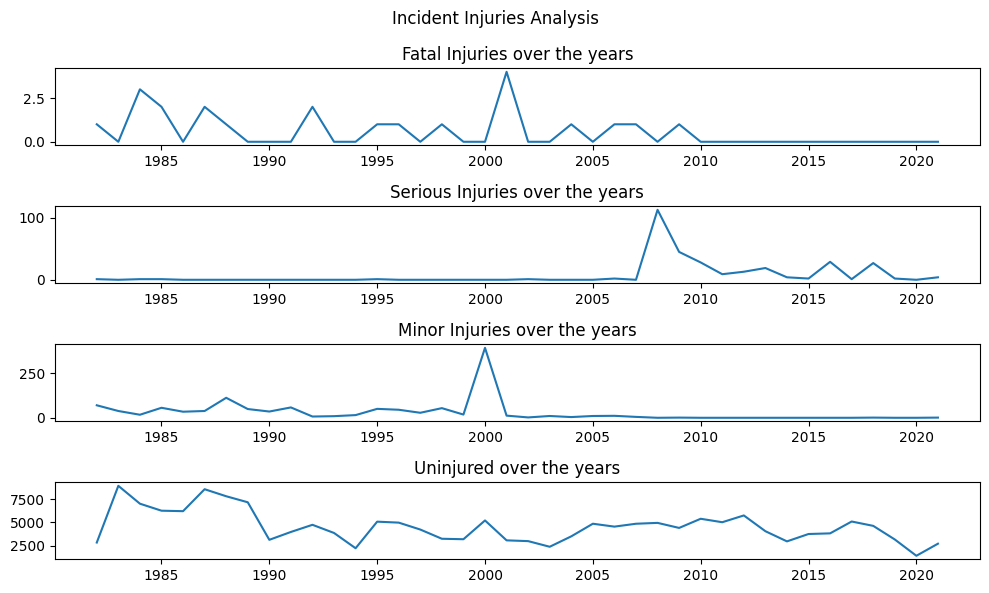

In [19]:
plt.figure(figsize=(10,6))

plt.subplot(4,1,1)
plt.plot(incident_injuries['Year'], incident_injuries['Total.Fatal.Injuries'])
plt.title('Fatal Injuries over the years')

plt.subplot(4,1,2)
plt.plot(incident_injuries['Year'], incident_injuries['Total.Serious.Injuries'])
plt.title('Serious Injuries over the years')

plt.subplot(4,1,3)
plt.plot(incident_injuries['Year'], incident_injuries['Total.Minor.Injuries'])
plt.title('Minor Injuries over the years')

plt.subplot(4,1,4)
plt.plot(incident_injuries['Year'], incident_injuries['Total.Uninjured'])
plt.title('Uninjured over the years')

plt.suptitle('Incident Injuries Analysis')
plt.tight_layout()
plt.show()

In [20]:
accident = df[df['Investigation.Type'] == 'Accident']
accident_injuries = accident.groupby('Year')[injuries_col].sum().reset_index()

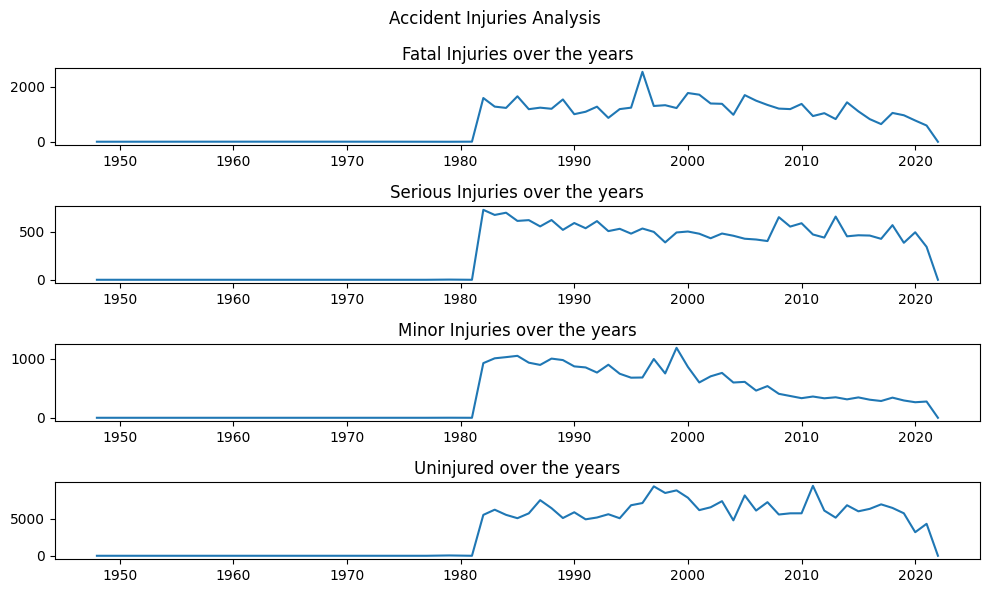

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(4,1,1)
plt.plot(accident_injuries['Year'], accident_injuries['Total.Fatal.Injuries'])
plt.title('Fatal Injuries over the years')

plt.subplot(4,1,2)
plt.plot(accident_injuries['Year'], accident_injuries['Total.Serious.Injuries'])
plt.title('Serious Injuries over the years')

plt.subplot(4,1,3)
plt.plot(accident_injuries['Year'], accident_injuries['Total.Minor.Injuries'])
plt.title('Minor Injuries over the years')

plt.subplot(4,1,4)
plt.plot(accident_injuries['Year'], accident_injuries['Total.Uninjured'])
plt.title('Uninjured over the years')

plt.suptitle('Accident Injuries Analysis')
plt.tight_layout()
plt.show()

In [22]:
print(df['Purpose.of.flight'].unique())

['Personal' 'Unknown' 'Business' 'Instructional' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'EXLD' 'BANT'
 'GLDT' 'PUBU' 'Air Race show' 'ADRP']


In [23]:
# cluster_df = df[["Injury.Severity", "Aircraft.damage",
#                  "Weather.Condition", "Purpose.of.flight",
#                  "Month", "Day"]]


In [24]:
# from sklearn.cluster import KMeans
# x = pd.get_dummies(cluster_df)
# wss = []


# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
#     kmeans.fit(x)
#     wss.append(kmeans.inertia_)


In [25]:
# wss

In [26]:
# plt.plot(range(1, 11), wss, marker='o')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WSS)')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [27]:


# x = pd.get_dummies(cluster_df)

# optimal_k = 4

# kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
# cluster_df['Cluster'] = kmeans.fit_predict(x)

# print(cluster_df.head())



In [28]:
# cluster_classification= cluster_df['Cluster'].value_counts()
# sns.barplot(x=cluster_classification.index,y= cluster_classification.values)
# plt.xlabel("Cluster")
# plt.ylabel("Count of Cluster")
# plt.title("Clustering classification")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      87282 non-null  object        
 1   Accident.Number         87282 non-null  object        
 2   Event.Date              87282 non-null  datetime64[ns]
 3   Country                 87056 non-null  object        
 4   Injury.Severity         87282 non-null  object        
 5   Aircraft.damage         87282 non-null  object        
 6   Make                    87219 non-null  object        
 7   Purpose.of.flight       87282 non-null  object        
 8   Total.Fatal.Injuries    87282 non-null  float64       
 9   Total.Serious.Injuries  87282 non-null  float64       
 10  Total.Minor.Injuries    87282 non-null  float64       
 11  Total.Uninjured         87282 non-null  float64       
 12  Weather.Condition       87282 non-null  object

In [30]:
# Grouping the data by 'Make' and counting the occurrences
top_makes = df.groupby('Make').size().reset_index(name='Count')

# Sorting the makes based on count in descending order
top_makes_sorted = top_makes.sort_values(by='Count', ascending=False)

# Selecting the top ten makes
top_ten_makes = top_makes_sorted.head(20)

print(top_ten_makes)

                   Make  Count
1525             Cessna  22227
5661              Piper  12029
1287             CESSNA   4549
908               Beech   4329
5478              PIPER   2618
919                Bell   2134
1037             Boeing   1594
3094            Grumman   1094
5096             Mooney   1092
677              BOEING   1054
610               BEECH    976
6180           Robinson    946
940            Bellanca    886
3610             Hughes    795
6713          Schweizer    629
328         Air Tractor    595
622                BELL    538
4927  Mcdonnell Douglas    526
279             Aeronca    487
4871              Maule    445


In [31]:
def clean_make(row):
    x = str(row['Make']).lower()
    if 'cessna' in x:
        return 'cessna'
    elif 'piper' in x:
        return 'piper'
    elif 'beech' in x:
        return 'beech'
    elif 'boeing' in x:
        return 'boeing'
    elif 'bell' in x and 'bellanca' not in x:
        return 'bell'
    else:
        return 'others'



In [32]:
us = df[df['Country']=='United States']

In [33]:
us.shape

(80998, 16)

In [34]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80998 entries, 0 to 87280
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      80998 non-null  object        
 1   Accident.Number         80998 non-null  object        
 2   Event.Date              80998 non-null  datetime64[ns]
 3   Country                 80998 non-null  object        
 4   Injury.Severity         80998 non-null  object        
 5   Aircraft.damage         80998 non-null  object        
 6   Make                    80977 non-null  object        
 7   Purpose.of.flight       80998 non-null  object        
 8   Total.Fatal.Injuries    80998 non-null  float64       
 9   Total.Serious.Injuries  80998 non-null  float64       
 10  Total.Minor.Injuries    80998 non-null  float64       
 11  Total.Uninjured         80998 non-null  float64       
 12  Weather.Condition       80998 non-null  object     

In [35]:
us_make = us.apply(clean_make, axis=1)
us_make.value_counts()

others    32439
cessna    25588
piper     14032
beech      5067
bell       2349
boeing     1523
Name: count, dtype: int64

In [36]:
us['make1'] = us.apply(clean_make, axis=1)

C:\Users\basne\AppData\Local\Temp\ipykernel_15000\2412805863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['make1'] = us.apply(clean_make, axis=1)


In [37]:
# def clean_make(row):
#     x = str(row['Make']).lower()
#     if 'cessna' in x or 'piper' in x:
#         return 'cessna or piper'
#     else:
#         return 'others'

# us['new_make'] = us.apply(clean_make, axis=1)

In [38]:
# us['new_make'].value_counts

In [39]:
us['Month'].value_counts()

Month
July         9902
August       9198
June         8842
May          7853
September    7633
April        6654
October      6295
March        6044
November     4953
February     4687
December     4508
January      4429
Name: count, dtype: int64

In [40]:
def clean_seasons(row):
    spring = ['march', 'april', 'may']
    summer = ['june', 'july', 'august']
    fall = ['september', 'october', 'november']
    winter = ['december', 'january', 'february']
    
    month = str(row['Month']).lower()
    
    if month in spring:
        return 'spring'
    elif month in summer:
        return 'summer'
    elif month in fall:
        return 'fall'
    elif month in winter:
        return 'winter'
    else:
        return None
    
us['Season'] = df.apply(clean_seasons, axis=1)

C:\Users\basne\AppData\Local\Temp\ipykernel_15000\2435029994.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['Season'] = df.apply(clean_seasons, axis=1)


In [41]:
us['Season'].value_counts()

Season
summer    27942
spring    20551
fall      18881
winter    13624
Name: count, dtype: int64

In [42]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80998 entries, 0 to 87280
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      80998 non-null  object        
 1   Accident.Number         80998 non-null  object        
 2   Event.Date              80998 non-null  datetime64[ns]
 3   Country                 80998 non-null  object        
 4   Injury.Severity         80998 non-null  object        
 5   Aircraft.damage         80998 non-null  object        
 6   Make                    80977 non-null  object        
 7   Purpose.of.flight       80998 non-null  object        
 8   Total.Fatal.Injuries    80998 non-null  float64       
 9   Total.Serious.Injuries  80998 non-null  float64       
 10  Total.Minor.Injuries    80998 non-null  float64       
 11  Total.Uninjured         80998 non-null  float64       
 12  Weather.Condition       80998 non-null  object     

In [43]:
def clean_weather(row):
    x = str(row['Weather.Condition']).upper()
    
    if 'UNK' in x:
        return 'UNK'
    else:
        return x

us['weather_condition'] = us.apply(clean_weather, axis=1)

C:\Users\basne\AppData\Local\Temp\ipykernel_15000\1619042605.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['weather_condition'] = us.apply(clean_weather, axis=1)


In [44]:
us['weather_condition'].value_counts()

weather_condition
VMC    74270
IMC     5586
UNK     1142
Name: count, dtype: int64

In [45]:
# def clean_make(row):
#     x = str(row['Make']).lower()
#     if 'cessna' in x or 'piper' in x:
#         return 'cessna or piper'
#     else:
#         return 'others'

# us['new_make'] = us.apply(clean_make, axis=1)

In [46]:
# def clean_severity(row):
#     x = str(row['Injury.Severity']).lower()
    
#     result = re.search(r"\(([0-9]*)\)", x)
#     try:
        
#         a = int(result.group(1))
#         if a >=100:
#             return 'fatal-3-digit'
#         elif 10<=a<100:
#             return 'fatal-2-digit'
#         else:
#             return 'fatal-1-digit'
#     except:
#         return x
    
# us['severity'] = us.apply(clean_severity, axis=1)

In [47]:
# us['severity'].value_counts()

In [48]:
# string = 'fatal(10)'
# a = re.search(r"\(([0-9]*)\)", string)
# print(a.group(1))

In [49]:
# us['Injury.Severity'].value_counts()

In [50]:
def clean_severity(row):
    x = str(row['Injury.Severity']).lower()
    
    if 'fatal' in x and 'non' not in x:
        return 'fatal'
    else:
        return 'non-fatal'
    
us['severity'] = us.apply(clean_severity, axis=1)

C:\Users\basne\AppData\Local\Temp\ipykernel_15000\2828070150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['severity'] = us.apply(clean_severity, axis=1)


In [51]:
us['severity'].value_counts()

severity
non-fatal    66176
fatal        14822
Name: count, dtype: int64

In [52]:
# def clean_fatal(row):
#     x = int(row['Total.Fatal.Injuries'])
    
#     if 0<x<10:
#         return '1-digit'
#     elif 10<=x<100:
#         return '2-digit'
#     elif x>=100:
#         return '3-digit'
#     else:
#         return 'non-fatal'
        
# us['fatal'] = us.apply(clean_fatal, axis=1)

In [53]:
label_encoder = LabelEncoder()
us['type'] = label_encoder.fit_transform(us['Investigation.Type'])
us['injury'] = label_encoder.fit_transform(us['Injury.Severity'])
us['damage'] = label_encoder.fit_transform(us['Aircraft.damage'])
us['weather'] = label_encoder.fit_transform(us['weather_condition'])
us['season'] = label_encoder.fit_transform(us['Season'])
us['day'] = label_encoder.fit_transform(us['Day'])
us['make_enc'] = label_encoder.fit_transform(us['make1'])
us['purpose_enc'] = label_encoder.fit_transform(us['Purpose.of.flight'])
us['severity_enc'] = label_encoder.fit_transform(us['severity'])
print(us.head())

C:\Users\basne\AppData\Local\Temp\ipykernel_15000\4026710809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['type'] = label_encoder.fit_transform(us['Investigation.Type'])
C:\Users\basne\AppData\Local\Temp\ipykernel_15000\4026710809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['injury'] = label_encoder.fit_transform(us['Injury.Severity'])
C:\Users\basne\AppData\Local\Temp\ipykernel_15000\4026710809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

  Investigation.Type Accident.Number Event.Date        Country  \
0           Accident      SEA87LA080 1948-10-24  United States   
1           Accident      LAX94LA336 1962-07-19  United States   
2           Accident      NYC07LA005 1974-08-30  United States   
3           Accident      LAX96LA321 1977-06-19  United States   
4           Accident      CHI79FA064 1979-08-02  United States   

  Injury.Severity Aircraft.damage      Make Purpose.of.flight  \
0        Fatal(2)       Destroyed   Stinson          Personal   
1        Fatal(4)       Destroyed     Piper          Personal   
2        Fatal(3)       Destroyed    Cessna          Personal   
3        Fatal(2)       Destroyed  Rockwell          Personal   
4        Fatal(1)       Destroyed    Cessna          Personal   

   Total.Fatal.Injuries  Total.Serious.Injuries  ...  severity  type injury  \
0                   2.0                     0.0  ...     fatal     0     18   
1                   4.0                     0.0  ...  

C:\Users\basne\AppData\Local\Temp\ipykernel_15000\4026710809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['severity_enc'] = label_encoder.fit_transform(us['severity'])


In [54]:
# us['fatal'].value_counts()

severity_enc
1    66176
0    14822
Name: count, dtype: int64


<Axes: xlabel='severity_enc'>

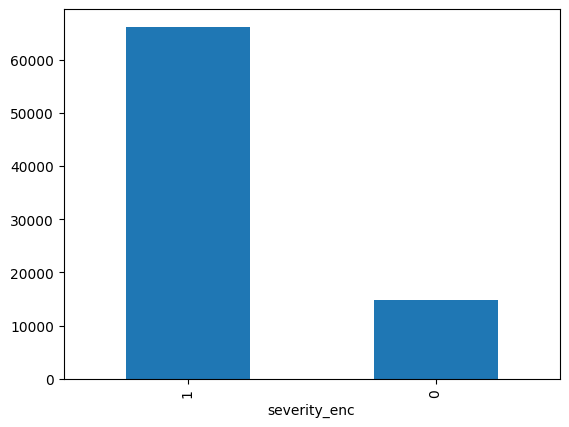

In [55]:
severity_counts = us['severity_enc'].value_counts()
print(severity_counts)
severity_counts.plot(kind='bar')

In [56]:
#splitting into target and feature variables
x1 = us[[ 'damage', 'weather', 'Year', 'day', 'season','purpose_enc',
         'make_enc']]
y1 = us['severity_enc']


#keep feature names
feature_names = x1.columns.tolist()

#standardization
scaler_std = StandardScaler()
x1_standardized = scaler_std.fit_transform(x1)
#print(x_standardized)

#convert standardized data back to dataframe
x1_df = pd.DataFrame(x1_standardized, columns=feature_names)
#print(x_df.head())

#split into train and test set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_df, y1, test_size=0.2,
                                                    random_state=42)
#random forest classifier
rf = RandomForestClassifier(n_jobs=-1)
# rf = RandomForestClassifier(n_estimators=150, max_depth=10)
rf.fit(x1_train, y1_train)

print(f"Train Accuracy: {rf.score(x1_train, y1_train)}")
print(f"Test Accuracy: {rf.score(x1_test, y1_test)}")

Train Accuracy: 0.9391184913114602
Test Accuracy: 0.874320987654321


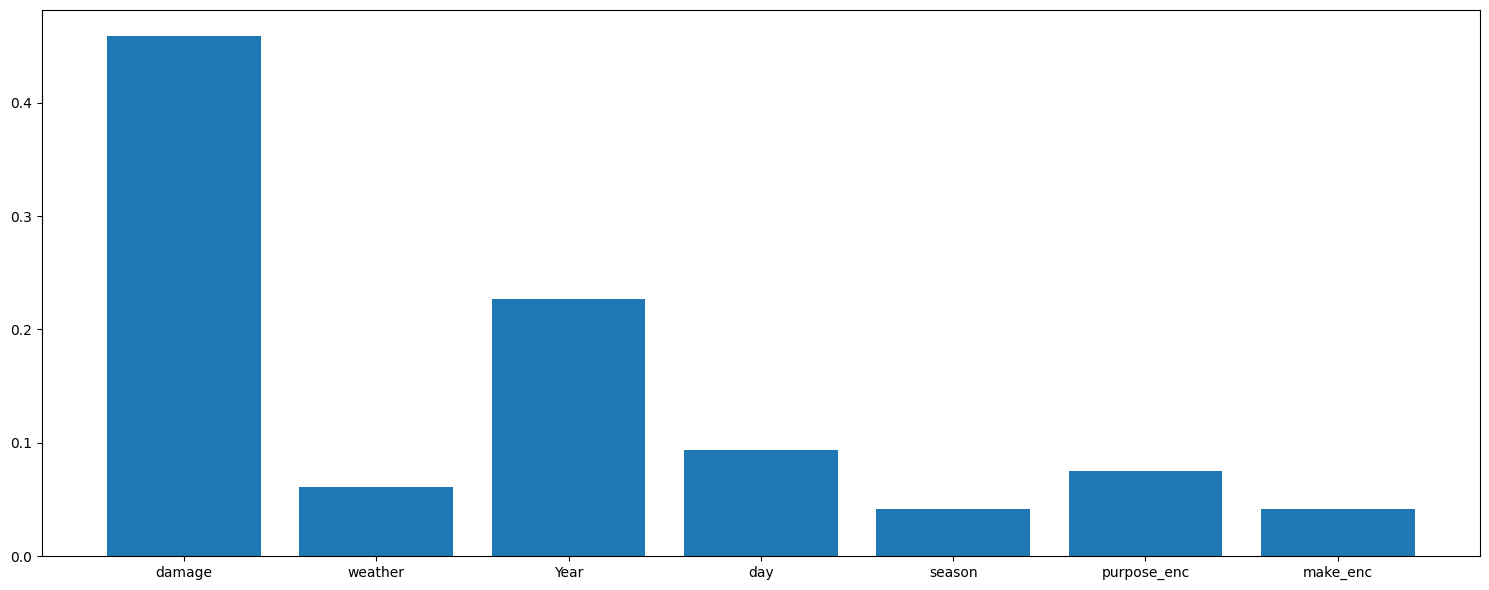

In [57]:
plt.figure(figsize=(15,6))
plt.bar((list(x1.columns)), rf.feature_importances_)
plt.tight_layout()
plt.show()

#### hyperparameter tuning
Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'max_depth': 10, 'max_features': 0.75, 'max_samples': 0.2, 'n_estimators': 150}
0.64481912446567

In [58]:
#random forest classifier
rf = RandomForestClassifier(max_depth=10, max_features=0.75,
                            max_samples=0.2, n_estimators=150, n_jobs=-1)
# rf = RandomForestClassifier(n_estimators=150, max_depth=10)
rf.fit(x1_train, y1_train)

print(f"Train Accuracy: {rf.score(x1_train, y1_train)}")
print(f"Test Accuracy: {rf.score(x1_test, y1_test)}")

Train Accuracy: 0.8913855365906355
Test Accuracy: 0.8908024691358025


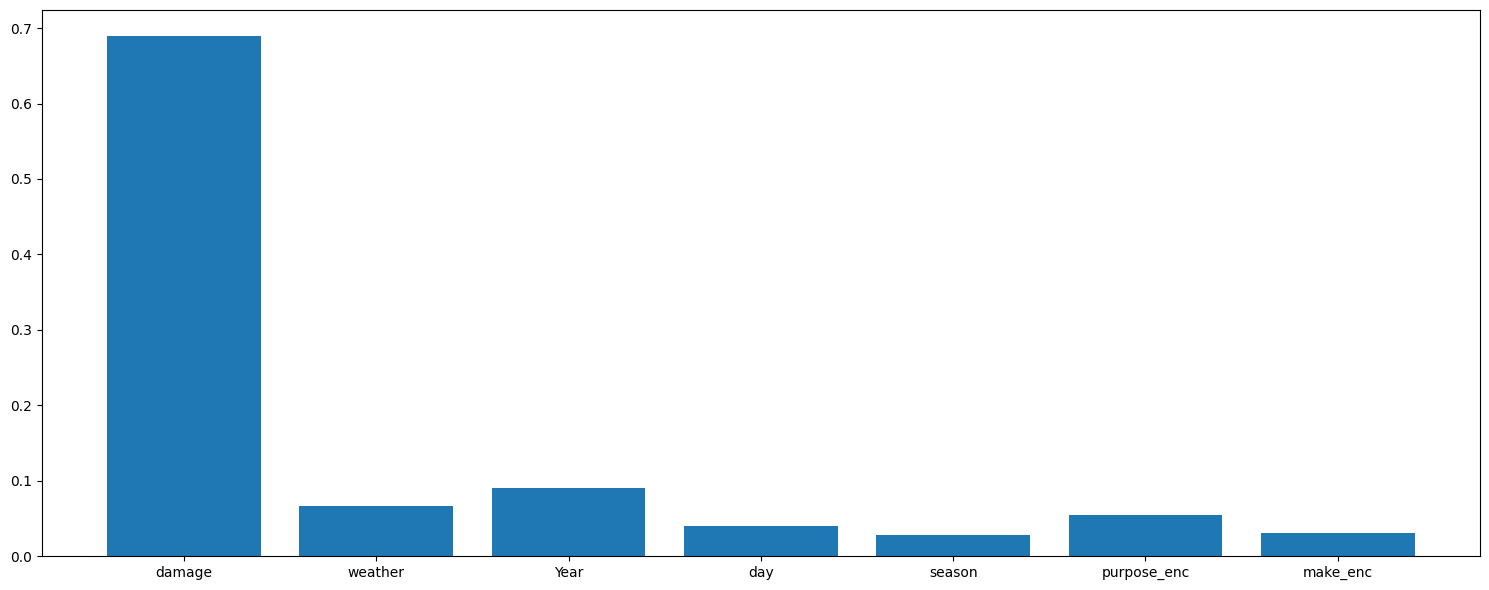

In [59]:
plt.figure(figsize=(15,6))
plt.bar((list(x1.columns)), rf.feature_importances_)
plt.tight_layout()
plt.show()

In [60]:
#splitting into target and feature variables
x1 = us[[ 'damage', 'weather', 'Year', 'day', 'season','purpose_enc',
         'make_enc']]
y1 = us['severity_enc']


#keep feature names
feature_names = x1.columns.tolist()

#standardization
scaler_std = StandardScaler()
x1_standardized = scaler_std.fit_transform(x1)
#print(x_standardized)

#convert standardized data back to dataframe
x1_df = pd.DataFrame(x1_standardized, columns=feature_names)
#print(x_df.head())

#split into train and test set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_df, y1, test_size=0.2,
                                                    random_state=42)
#random forest classifier
rf = RandomForestClassifier(max_depth=10, max_features=0.75,
                            max_samples=0.2, n_estimators=150, n_jobs=-1)
rf.fit(x1_train, y1_train)

print(f"Train Accuracy: {rf.score(x1_train, y1_train)}")
print(f"Test Accuracy: {rf.score(x1_test, y1_test)}")

Train Accuracy: 0.8909842896385691
Test Accuracy: 0.8903703703703704


In [61]:
from sklearn.metrics import classification_report
y_pred = rf.predict(x1_test)
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      3030
           1       0.93      0.93      0.93     13170

    accuracy                           0.89     16200
   macro avg       0.82      0.82      0.82     16200
weighted avg       0.89      0.89      0.89     16200



In [62]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [63]:
rus = RandomUnderSampler(random_state=42)
nm = NearMiss(version=1)

In [64]:
x1.shape

(80998, 7)

In [65]:
y1.value_counts()

severity_enc
1    66176
0    14822
Name: count, dtype: int64

In [66]:
x_res, y_res = rus.fit_resample(x1,y1)

In [67]:
print(x_res.shape)
(y_res.shape)

(29644, 7)


(29644,)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2,
                                                    random_state=42)
#random forest classifier
rf = RandomForestClassifier(max_depth=10, max_features=0.75,
                            max_samples=0.2, n_estimators=150, n_jobs=-1)
rf.fit(x_train, y_train)

print(f"Train Accuracy: {rf.score(x_train, y_train)}")
print(f"Test Accuracy: {rf.score(x_test, y_test)}")

Train Accuracy: 0.8325110689437065
Test Accuracy: 0.8230730308652386


In [69]:
from sklearn.metrics import classification_report
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3008
           1       0.77      0.91      0.84      2921

    accuracy                           0.82      5929
   macro avg       0.83      0.82      0.82      5929
weighted avg       0.83      0.82      0.82      5929



In [70]:
import joblib

In [71]:
joblib.dump(rf, 'aviation.joblib')

['aviation.joblib']

In [72]:
rfc_av = joblib.load('aviation.joblib')

In [73]:
feature_names = ['damage', 'weather', 'Year', 'purpose_enc']
data = [[1,0, 2000, 1]]
data_df = pd.DataFrame(data, columns=feature_names)

#standardization
scaler_std = StandardScaler()
x1_standardized = scaler_std.fit_transform(data_df)
#print(x_standardized)

#convert standardized data back to dataframe
x1_df = pd.DataFrame(x1_standardized, columns=feature_names)

rfc_value = rfc_av.predict(x1_df)

print(rfc_value)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- day
- make_enc
- season


In [ ]:
us['Total.Uninjured'].value_counts()

In [ ]:
import imblearn

In [ ]:
import site

In [ ]:
site.getsitepackages()